In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/co-544-project/testdata.csv
/kaggle/input/co-544-project/trainData.csv


In [41]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [42]:
#import test and train datasets
df_train=pd.read_csv('/kaggle/input/co-544-project/trainData.csv')
df_test=pd.read_csv('/kaggle/input/co-544-project/testdata.csv')
df_train.head()

A1     A2 A3 A4     A5 A6    A7     A8 A9   A10   A11  A12    A13  A14 A15  \
0  b  30.83  u  g   0.00  w     0   True  v  1.25  True    1  False  202   g   
1  a  58.67  u  g   4.46  q   560   True  h  3.04  True    6  False   43   g   
2  a   24.5  u  g   0.50  q   824  False  h  1.50  True    0  False  280   g   
3  b  27.83  u  g   1.54  w     3   True  v  3.75  True    5   True  100   g   
4  b     25  u  g  11.25  c  1208   True  v  2.50  True   17  False  200   g   

       A16  
0  Success  
1  Success  
2  Success  
3  Success  
4  Success

In [43]:
A16=df_train.A16;
data=pd.concat([df_train.drop(['A16'],axis=1),df_test]);
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 137
Data columns (total 15 columns):
A1     690 non-null object
A2     690 non-null object
A3     690 non-null object
A4     690 non-null object
A5     690 non-null float64
A6     690 non-null object
A7     690 non-null int64
A8     690 non-null bool
A9     690 non-null object
A10    690 non-null float64
A11    690 non-null bool
A12    690 non-null int64
A13    690 non-null bool
A14    690 non-null object
A15    690 non-null object
dtypes: bool(3), float64(2), int64(2), object(8)
memory usage: 72.1+ KB


In [44]:
#replace ? with nan
data=data.replace("?",np.NaN)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 137
Data columns (total 15 columns):
A1     678 non-null object
A2     678 non-null object
A3     684 non-null object
A4     684 non-null object
A5     690 non-null float64
A6     681 non-null object
A7     690 non-null int64
A8     690 non-null bool
A9     681 non-null object
A10    690 non-null float64
A11    690 non-null bool
A12    690 non-null int64
A13    690 non-null bool
A14    677 non-null object
A15    690 non-null object
dtypes: bool(3), float64(2), int64(2), object(8)
memory usage: 72.1+ KB


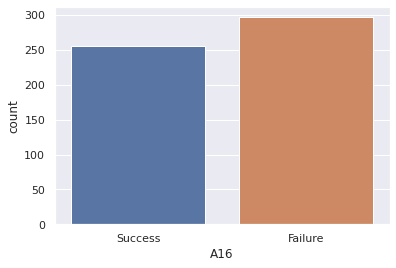

In [29]:
#target value plot
sns.countplot(x='A16',data=df_train)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


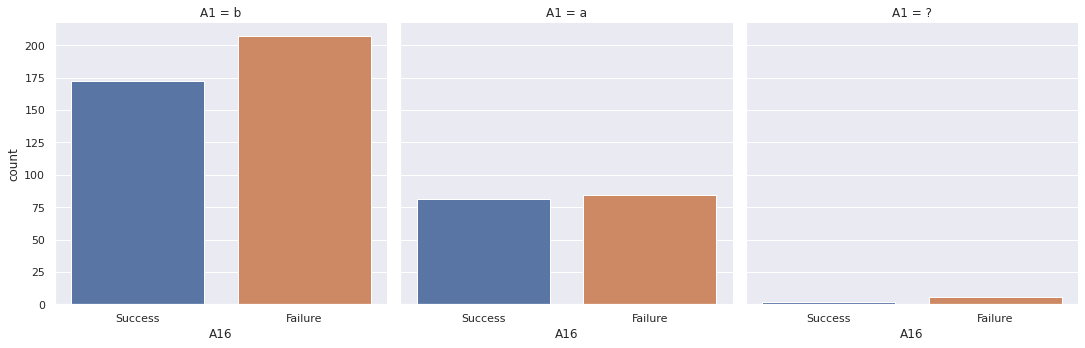

In [30]:
sns.factorplot(x='A16',col='A1',kind='count',data=df_train);

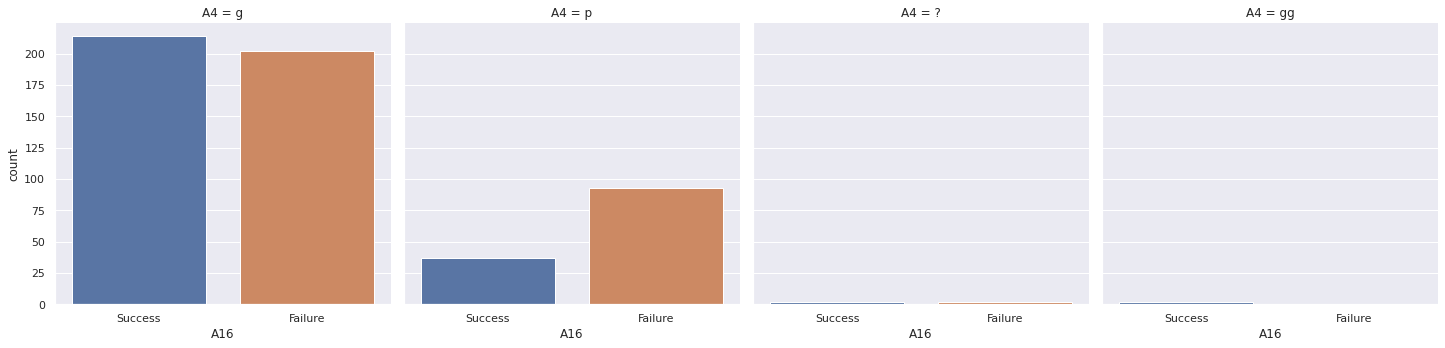

In [32]:
sns.factorplot(x='A16',col='A4',kind='count',data=df_train);

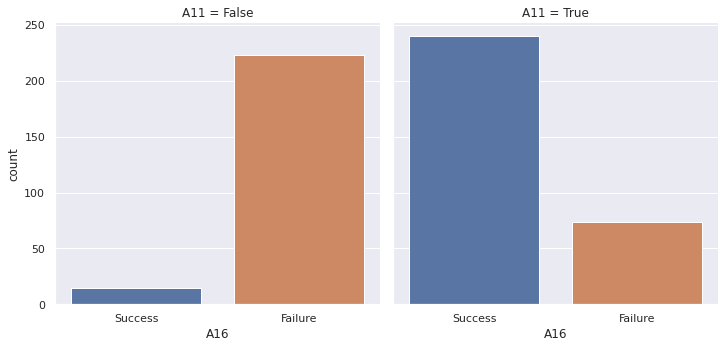

In [33]:
sns.factorplot(x='A16',col='A11',kind='count',data=df_train);

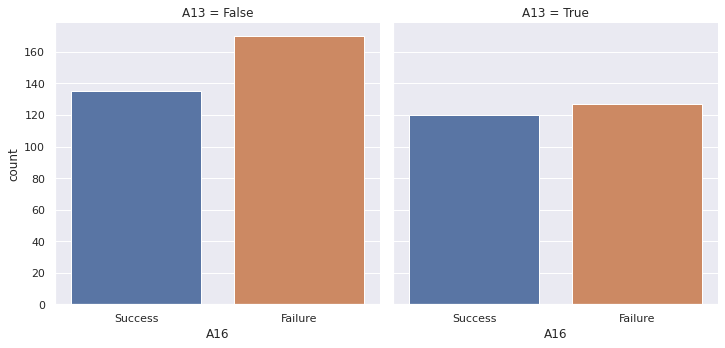

In [34]:
sns.factorplot(x='A16',col='A13',kind='count',data=df_train);

In [45]:
#convert object to float a2 a14
data["A2"] = data.A2.astype(float)
data["A14"] = data.A14.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 137
Data columns (total 15 columns):
A1     678 non-null object
A2     678 non-null float64
A3     684 non-null object
A4     684 non-null object
A5     690 non-null float64
A6     681 non-null object
A7     690 non-null int64
A8     690 non-null bool
A9     681 non-null object
A10    690 non-null float64
A11    690 non-null bool
A12    690 non-null int64
A13    690 non-null bool
A14    677 non-null float64
A15    690 non-null object
dtypes: bool(3), float64(4), int64(2), object(6)
memory usage: 72.1+ KB


In [46]:
#numreical columns
num_cols=['A2','A5','A7','A10','A12','A14']

#categorical columns
cat_cols=data.columns.drop(num_cols)
cat_cols

Index(['A1', 'A3', 'A4', 'A6', 'A8', 'A9', 'A11', 'A13', 'A15'], dtype='object')

In [47]:
data.describe()

A2          A5             A7         A10        A12  \
count  678.000000  690.000000     690.000000  690.000000  690.00000   
mean    31.568171    4.758725    1017.385507    2.223406    2.40000   
std     11.957862    4.978163    5210.102598    3.346513    4.86294   
min     13.750000    0.000000       0.000000    0.000000    0.00000   
25%     22.602500    1.000000       0.000000    0.165000    0.00000   
50%     28.460000    2.750000       5.000000    1.000000    0.00000   
75%     38.230000    7.207500     395.500000    2.625000    3.00000   
max     80.250000   28.000000  100000.000000   28.500000   67.00000   

               A14  
count   677.000000  
mean    184.014771  
std     173.806768  
min       0.000000  
25%      75.000000  
50%     160.000000  
75%     276.000000  
max    2000.000000

In [48]:
#numerical imputer
imp= SimpleImputer(missing_values=np.nan,strategy='mean');
data[num_cols]=imp.fit_transform(data[num_cols])
#categorical imputer
cat_imp= SimpleImputer(missing_values=np.nan,strategy='most_frequent');
data[cat_cols]=cat_imp.fit_transform(data[cat_cols])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 137
Data columns (total 15 columns):
A1     690 non-null object
A2     690 non-null float64
A3     690 non-null object
A4     690 non-null object
A5     690 non-null float64
A6     690 non-null object
A7     690 non-null float64
A8     690 non-null bool
A9     690 non-null object
A10    690 non-null float64
A11    690 non-null bool
A12    690 non-null float64
A13    690 non-null bool
A14    690 non-null float64
A15    690 non-null object
dtypes: bool(3), float64(6), object(6)
memory usage: 72.1+ KB


In [10]:
#hot encoder
# features = pd.get_dummies(data)
# features.head(5)

In [49]:
#Get dummies
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data[cat_cols] = data[cat_cols].apply(lambda col: le.fit_transform(col))
data[cat_cols].head(10)

A1  A3  A4  A6  A8  A9  A11  A13  A15
0   1   1   0  12   1   7    1    0    0
1   0   1   0  10   1   3    1    0    0
2   0   1   0  10   0   3    1    0    0
3   1   1   0  12   1   7    1    1    0
4   1   1   0   1   1   7    1    0    0
5   1   1   0   1   0   7    1    0    2
6   0   1   0   1   1   7    1    1    0
7   0   1   0  13   1   3    1    0    0
8   0   1   0  10   1   7    1    1    0
9   0   1   0   1   1   3    1    0    0

In [50]:
#split data back to train and test
data_train=data.iloc[:552];
data_test=data.iloc[552:];

In [59]:
#data for final model
x=data_train.values;
test=data_test.values;
y=A16.values;

#Testing with split data

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [58]:
#Decision Tree
from sklearn import tree
for depth in range(1,15):
    clf=tree.DecisionTreeClassifier(max_depth=depth);
    clf.fit(X_train,y_train)
    print("depth=%d score_train=%f score_test=%f"%(depth,clf.score(X_train,y_train),clf.score(X_test,y_test)))

depth=1 score_train=0.840580 score_test=0.833333
depth=2 score_train=0.842995 score_test=0.840580
depth=3 score_train=0.850242 score_test=0.840580
depth=4 score_train=0.886473 score_test=0.876812
depth=5 score_train=0.910628 score_test=0.855072
depth=6 score_train=0.946860 score_test=0.855072
depth=7 score_train=0.973430 score_test=0.847826
depth=8 score_train=0.985507 score_test=0.855072
depth=9 score_train=0.992754 score_test=0.862319
depth=10 score_train=0.997585 score_test=0.833333
depth=11 score_train=1.000000 score_test=0.811594
depth=12 score_train=1.000000 score_test=0.818841
depth=13 score_train=1.000000 score_test=0.862319
depth=14 score_train=1.000000 score_test=0.840580


In [16]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier=RandomForestClassifier(n_estimators= 1000, random_state=42)
randomForestClassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [17]:
randomForestClassifier.score(X_test,y_test)

0.9057971014492754

#Random forest


In [18]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier=RandomForestClassifier(n_estimators= 1000, random_state=42)
randomForestClassifier.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
#logistic regression
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0).fit(x, y)
# Y_pred=clf.predict(test)

In [20]:
#make prediction on test data set
#Y_pred=clf.predict(test);
#random forest
# Y_pred=randomForestClassifier.predict(test)
# df_test['Category']=Y_pred;
# df_test

In [21]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=11)
# neigh.fit(x,y)
# Y_pred=neigh.predict(test)
# df_test['Category']=Y_pred;



In [61]:
#Decision Tree
clf=tree.DecisionTreeClassifier(max_depth=3);
clf.fit(x,y)
Y_pred=clf.predict(test)
df_test['Category']=Y_pred

In [63]:
#save to csv
df_test["id"] = df_test.index+1
df_test[['id','Category']].to_csv('Des11.csv',index=False);